# INM713 SWT & KG Coursework Dataset Analysis

In [37]:
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_theme()

In [90]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("INM713_coursework_data_pizza_8358_1_reduced.csv")

In [4]:
# Quick check
df.head(5)

,name,address,city,country,postcode,state,categories,menu item,item value,currency,item description
0,Little Pizza Paradise,Cascade Village Mall Across From Target,Bend,US,97701,OR,Pizza Place,Bianca Pizza,22.50,USD,NaN
1,Little Pizza Paradise,Cascade Village Mall Across From Target,Bend,US,97701,OR,Pizza Place,Cheese Pizza,18.95,USD,NaN
2,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Margherita",12.00,USD,NaN
3,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Mushroom",13.00,USD,NaN
4,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Puttenesca",13.00,USD,"Olives, onions, capers, tomatoes"


## Initial analysis

In [5]:
df_copy = df.copy(deep=True)

In [6]:
# Check for duplicated rows
df_copy.duplicated().value_counts()

False    3499
True       11
dtype: int64

In [7]:
# Check for restaurants without menu items
df_copy["name"].value_counts()

Sicilia's Pizzeria                       96
J & G Restaurant                         55
Casey's General Store                    43
The Pizza Joint                          36
North End Pizzeria                       34
                                         ..
Buona Vita Pizzeria                       1
Don Carmelo's Pizzeria                    1
East End Kitchen - Permanently Closed     1
Wei Chuan Kitchen                         1
Lucky Star Lounge                         1
Name: name, Length: 933, dtype: int64

There are no rows without menu items, but there are 11 duplicated rows. We will leave them in there, but this means I will expect to find 3499 Individuals of type MenuItem in my resulting knowledge graph.

In [8]:
# Check the completeness of the columns
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3510 non-null   object 
 1   address           3510 non-null   object 
 2   city              3510 non-null   object 
 3   country           3510 non-null   object 
 4   postcode          3445 non-null   object 
 5   state             3510 non-null   object 
 6   categories        3510 non-null   object 
 7   menu item         3510 non-null   object 
 8   item value        2948 non-null   float64
 9   currency          2951 non-null   object 
 10  item description  1526 non-null   object 
dtypes: float64(1), object(10)
memory usage: 301.8+ KB


In [9]:
# Check the country
df_copy["country"].value_counts()

US    3510
Name: country, dtype: int64

In [10]:
# Check length of values in postcode column
df_copy["postcode_len"] = df_copy["postcode"].astype(str).map(len)
df_copy["postcode_len"].value_counts()

5     2782
4      635
3       66
10      27
Name: postcode_len, dtype: int64

In [11]:
# Check where the NaNs are for postcode_len == 3
df_copy.loc[(df_copy["postcode"].isnull())]

,name,address,city,country,postcode,state,categories,menu item,item value,currency,item description,postcode_len
25,Country Bagel Bakery,145 E Gay St,West Chester,US,NaN,PA,"Bagels,Bakeries,Restaurants,Restaurant,Breakfa...",Pizza Bagel,NaN,USD,with pepperoni,3
26,Country Bagel Bakery,145 E Gay St,West Chester,US,NaN,PA,"Bagels,Bakeries,Restaurants,Restaurant,Breakfa...",Pizza Bagel,NaN,USD,with mushroom,3
27,Country Bagel Bakery,145 E Gay St,West Chester,US,NaN,PA,"Bagels,Bakeries,Restaurants,Restaurant,Breakfa...",Pizza Bagel,NaN,USD,with pepperoni & mushroom,3
28,Country Bagel Bakery,145 E Gay St,West Chester,US,NaN,PA,"Bagels,Bakeries,Restaurants,Restaurant,Breakfa...",Pizza Bagel (plain),2.59,USD,NaN,3
29,Country Bagel Bakery,145 E Gay St,West Chester,US,NaN,PA,"Bagels,Bakeries,Restaurants,Restaurant,Breakfa...",Pizza Bagel With Mushroom,3.29,USD,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3376,San Biagio's Pizza,1263 7th St,Upland,US,NaN,CA,"Pizza Place,Italian Restaurant",New White Pizza,21.50,USD,"Fresh tomato, garlic, and onion",3
3377,San Biagio's Pizza,1263 7th St,Upland,US,NaN,CA,"Pizza Place,Italian Restaurant",New York Pizza,2.25,USD,NaN,3
3378,San Biagio's Pizza,1263 7th St,Upland,US,NaN,CA,"Pizza Place,Italian Restaurant",Pizza Sandwich,4.00,USD,NaN,3
3379,San Biagio's Pizza,1263 7th St,Upland,US,NaN,CA,"Pizza Place,Italian Restaurant",Pizza Sandwich and Medium Drink,5.00,USD,NaN,3


In [12]:
# Check the count of where postcode is NaN
df_copy["postcode"].isnull().value_counts()

False    3445
True       65
Name: postcode, dtype: int64

In [13]:
# df_copy["postcode_clean"] = df_copy["postcode"].str.isdigit().astype(str).str.zfill(5)
# df_copy["postcode_clean"].astype(str).map(len).value_counts() # Ignore NaNs: len == 3!

In [14]:
mask = (df_copy["postcode_len"] == 10)
df_copy.loc[mask].head(5)

,name,address,city,country,postcode,state,categories,menu item,item value,currency,item description,postcode_len
938,Cafe Americana,550 Main St,Cincinnati,US,45202-5211,OH,"Food And Dining,Restaurant Central Business Di...",Pizza Burger,3.95,USD,NaN,10
939,Cafe Americana,550 Main St,Cincinnati,US,45202-5211,OH,"Food And Dining,Restaurant Central Business Di...",Pizza or Mushroom Hoagie,4.95,USD,NaN,10
1295,The Grille At Shadowrock Sedona Hilton,90 Ridge Trail Dr,Sedona,US,86351-7390,AZ,Restaurant,Thin Crust Pizza,15.00,USD,NaN,10
1434,The Allen Street Grill (hotel State College),100 W College Ave,State College,US,16801-3838,PA,Restaurant,Naan Pizza 1,7.95,USD,"Arugula, prosciutto, parmesan and garlic oil.",10
1435,The Allen Street Grill (hotel State College),100 W College Ave,State College,US,16801-3838,PA,Restaurant,Naan Pizza 2,8.95,USD,"Smoked chicken thighs, gouda cheese, fried red...",10


In [15]:
# Check length of values in state column
df_copy["state_len"] = df_copy["state"].astype(str).map(len)
df_copy["state_len"].value_counts()

2     2434
13     120
9      119
11      96
12      86
3       86
10      82
6       79
7       66
14      65
4       54
15      38
5       35
8       30
18      24
19      21
28      20
16      19
21      16
17      12
20       5
23       2
22       1
Name: state_len, dtype: int64

In [17]:
# Check what these long values are
df_copy.loc[df_copy["state_len"] == 13]

,name,address,city,country,postcode,state,categories,menu item,item value,currency,item description,postcode_len,state_len
81,Nino's Trattoria & Pizzeria,111 Lawrence Rd,Lawrence Township,US,8648,Lawrenceville,"Pizza Place,Italian Restaurant,Restaurants,Piz...",Blt Pizza,19.95,USD,NaN,4,13
82,Nino's Trattoria & Pizzeria,111 Lawrence Rd,Lawrence Township,US,8648,Lawrenceville,"Pizza Place,Italian Restaurant,Restaurants,Piz...",Cheese Pizza,11.95,USD,NaN,4,13
83,Nino's Trattoria & Pizzeria,111 Lawrence Rd,Lawrence Township,US,8648,Lawrenceville,"Pizza Place,Italian Restaurant,Restaurants,Piz...",Cheese Pizza,11.95,USD,Classic cheese or create your own pizza.,4,13
84,Nino's Trattoria & Pizzeria,111 Lawrence Rd,Lawrence Township,US,8648,Lawrenceville,"Pizza Place,Italian Restaurant,Restaurants,Piz...",Cheese Pizza Slice,2.00,USD,NaN,4,13
85,Nino's Trattoria & Pizzeria,111 Lawrence Rd,Lawrence Township,US,8648,Lawrenceville,"Pizza Place,Italian Restaurant,Restaurants,Piz...",Cheesesteak Stuffed Cheese Pizza,22.95,USD,NaN,4,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,Angry Ham's Octane Bar & Grill,2 Beacon St,Framingham,US,1701,Framingham So,"American Restaurant,Bar",Creat Your Own Pizza,16.00,USD,NaN,4,13
3273,Cugino's Pizza,2151 Lemoine Ave,Fort Lee,US,7024,West Fort Lee,Pizza Place,White Pizza,14.95,USD,NaN,4,13
3332,Primanti Bros,516 E Oakland Park Blvd,Fort Lauderdale,US,33334,Wilton Manors,"Italian Restaurants,Bars,Pizza,Taverns,Restaur...",Family Pizza Nights,1.50,USD,NaN,5,13
3385,Brio Tuscan Grille - Murray,6173 S State St,Salt Lake City,US,84107,Salt Lake Cty,Restaurant,Sausage Onion Jam Pizza,8.95,USD,"Boursin, mozzarella, arugula, parmesan",5,13


In [18]:
# Check the currency
df_copy["currency"].value_counts()

USD    2951
Name: currency, dtype: int64

In [46]:
# Double check if all menu items are something to do with pizza
df_copy["menu item"].str.lower().str.contains("pizza").value_counts()

True    3510
Name: menu item, dtype: int64

In [59]:
df_copy["menu item"].value_counts().nlargest(10)

Cheese Pizza             136
White Pizza               75
Margherita Pizza          63
Pizza                     62
Hawaiian Pizza            54
Pizza Burger              50
Bbq Chicken Pizza         47
Buffalo Chicken Pizza     44
Pepperoni Pizza           44
Veggie Pizza              34
Name: menu item, dtype: int64

In [65]:
# Check how many of these menu items are pizzas - we assume that a pizza will be described in the format of <name> pizza
df_copy["menu item"].str.lower().str.endswith("pizza").value_counts()

True     2431
False    1079
Name: menu item, dtype: int64

In [76]:
# Based on our above assumption, check what sort of common typed pizza distribution we have
df_copy["menu item"][df_copy["menu item"].str.lower().str.endswith("pizza")].value_counts().nlargest(30)

Cheese Pizza               136
White Pizza                 75
Margherita Pizza            63
Pizza                       62
Hawaiian Pizza              54
Bbq Chicken Pizza           47
Buffalo Chicken Pizza       44
Pepperoni Pizza             44
Taco Pizza                  34
Veggie Pizza                34
Greek Pizza                 30
Mexican Pizza               29
Sicilian Pizza              24
Vegetarian Pizza            21
Create Your Own Pizza       20
Build Your Own Pizza        18
Breakfast Pizza             17
Margarita Pizza             16
Meat Lovers Pizza           14
Specialty Pizza             13
Chicago Deep Dish Pizza     11
Any Large Pizza             10
Pita Pizza                  10
Sausage Onion Jam Pizza     10
Mediterranean Pizza          9
Seafood Pizza                9
Supreme Pizza                8
Deluxe Pizza                 8
Tuna Pizza                   8
Kids Pizza                   8
Name: menu item, dtype: int64

In [24]:
# Check range of values for item value/price
df_copy["item value"].describe()

count    2948.000000
mean       12.479186
std        13.398923
min         0.000000
25%         7.500000
50%        11.870000
75%        15.950000
max       312.950000
Name: item value, dtype: float64

/Users/fei/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


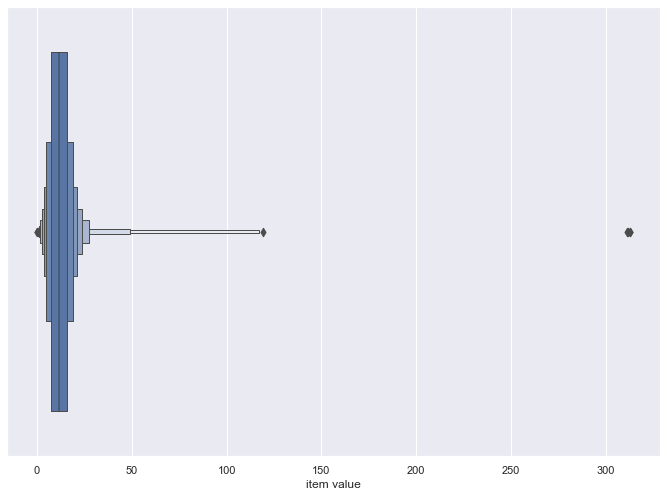

In [41]:
sns.set(rc={"figure.figsize":(11.7, 8.27)})
sns.boxenplot(df_copy["item value"]);

In [26]:
df_copy.loc[df_copy["item value"]>90]

,name,address,city,country,postcode,state,categories,menu item,item value,currency,item description,postcode_len,state_len
226,California Pizza Kitchen,10300 Forest Hill Blvd,Wellington,US,33414,Village Of Wellington,"Pizza Place,Take Out Restaurants,American Rest...",Pizza,116.99,USD,NaN,5,21
483,California Pizza Kitchen,3401 Esperanza Xing,Austin,US,78758,TX,"Pizza,Take Out Restaurants,Restaurants,America...",Pizza,116.99,USD,NaN,5,2
534,California Pizza Kitchen,109 W County Ctr,Saint Louis,US,63131,Country Life Acres,"Pizza Place,Restaurants,Pizza,American Restaur...",Pizza,116.99,USD,NaN,5,18
900,California Pizza Kitchen - Nyc,440 Park Ave S,New York,US,10016,Nyc,"Restaurant,Pizza Place",Pizza,118.99,USD,NaN,5,3
993,Terrace Bagel,222 And 222a Prospect W,Brooklyn,US,11215,NY,"Bagel Shop,Bagel Shop South Slope",Steak Pizzaiola,100.00,USD,NaN,5,2
1137,California Pizza Kitchen,11800 W Broad St,Henrico,US,23233,VA,Pizza Place,Pizza,116.99,USD,NaN,5,2
2569,Eddie's Italian Restaurant,4002 Lincoln Blvd,Marina Del Rey,US,90292,CA,"Pizza,Italian Restaurant Marina del Rey,Italia...",Pizza Claudia,312.95,USD,"Ham, anchovies, roasted peppers and black olives",5,2
2570,Eddie's Italian Restaurant,4002 Lincoln Blvd,Marina Del Rey,US,90292,CA,"Pizza,Italian Restaurant Marina del Rey,Italia...",Pizza Margarita,310.95,USD,Fresh basil,5,2
2571,Eddie's Italian Restaurant,4002 Lincoln Blvd,Marina Del Rey,US,90292,CA,"Pizza,Italian Restaurant Marina del Rey,Italia...",Pizza Pepperoni,311.95,USD,NaN,5,2
2573,Eddie's Italian Restaurant,4002 Lincoln Blvd,Marina Del Rey,US,90292,CA,"Pizza,Italian Restaurant Marina del Rey,Italia...",Pizza Raviatta,312.95,USD,"Fresh veal, roasted peppers, black olives and ...",5,2


In [66]:
# Check if we have ingredient information in this dataset
df_copy["item description"].str.lower().value_counts()

cheese or pepperoni                                                                                      13
with 2 cups of pizza sauce                                                                               10
with up to 5 toppings, including specialties                                                             10
three medium three topping pizzas                                                                        10
boursin, mozzarella, arugula, parmesan                                                                   10
                                                                                                         ..
shredded romaine, caesar dressing, shredded parmesan cheese, marinated chicken                            1
house made tomato sauce, fresh mozzarella, chopped garlic, sliced tomatoes, parmesan cheese and basil     1
with our homemade sauce                                                                                   1
pepperoni, sausage, ham, gro

In [68]:
df_copy["item description"].str.lower().str.contains("tomato").value_counts()

False    1089
True      437
Name: item description, dtype: int64

In [48]:
df_copy["item description"].str.lower().str.contains("cheese").value_counts()

False    899
True     627
Name: item description, dtype: int64

- The item value column is correctly identified as float.
- The entire dataset is from the US.
- So I expected to see a 5 or 5+4 digit length postcodes, according to <https://en.wikipedia.org/wiki/ZIP_Code>. There are postcodes of 5, 4, 3, and 10, which fit the expected formats of `^\d{5}$`, `^0\d{4}$`, `^00\d{3}$` and `^\d{5}-\d{4}$`.
- I also expected to see state values of length 2 (2 letters), or something that looked like names. From the length, some seemed too long to be state names.
- By doing a quick Google, I found that Lawrenceville is a city within Lawrence Township, but the former is down as a state and the latter the city. For Salt Lake City, it is down as both city and state, when it is a famous city in the state of Utah. The data entry is not very reliable for the state column.
- The currency is consistent where it is not null.
- All menu items for all rows mention pizza, but a third of them may not be about pizza.
- I now have an idea what sort of pizzas we can try and model for.
- The price range for menu items of these pizza restaurants are described here. Either there is a little bad data entry or there are some really expensive pizzas. We'll assume the latter.
- The item description column has a low completion rate, is inconsistently populated, and we don't really know what ingredients are in there. I don't think this column is much use.

## What's a Hawaiian Pizza?

We take the top popular pizzas (ignoring the generic "Pizza") here and seeing if we can understand what some of these popular items are.

```
Cheese Pizza               136
White Pizza                 75
Margherita Pizza            63
Pizza                       62
Hawaiian Pizza              54
Bbq Chicken Pizza           47
Buffalo Chicken Pizza       44
Pepperoni Pizza             44
Taco Pizza                  34
Veggie Pizza                34
Greek Pizza                 30
Mexican Pizza               29
Sicilian Pizza              24
Vegetarian Pizza            21
```

In [97]:
df_copy["item description"][df_copy["menu item"].str.lower().str.contains("margherita pizza")]

69                                                                                           Fresh mozzarella and basil
75                                                                                                                  NaN
91                                                                                                                  NaN
92                                                                              Brooklyn style. Square thick pan pizza.
141                                                                                                                 NaN
162                                                         Fresh basil, rich tomato sauce and fresh mozzarella cheese.
343                                                                              Mozzarella cheese, marinara and basil.
382                                                                                                                 NaN
383                                     

In [101]:
df_copy["item description"][df_copy["menu item"].str.lower().str.contains("white pizza")]

                                                                                               NaN
270                                                                                                                                                   Mozzarella, ricotta and parmesan cheeses
280                                                                                                                                          Alfredo sauce, mozzarella, and provolone cheese .
281                                                                                                      Provolone cheese, garlic, olive oil, sliced tomatoes (may substitute another topping)
292                                                                                                                                                                                        NaN
316                                                                                                                                      